## Magic Methods and Operator Overloading


### Introduction
<img class="imgright" width=300 src="../images/marvin_the_magician.webp" srcset="../images/marvin_the_magician_400w.webp 400w,../images/marvin_the_magician_350w.webp 350w,../images/marvin_the_magician_300w.webp 300w" alt="Marvin, the magician" />

The so-called magic methods have nothing to do with wizardry. You have already seen them in the previous chapters of our tutorial. They are special methods with fixed names. They are the methods with this clumsy syntax, i.e. the double underscores at the beginning and the end. They are also hard to talk about. How do you pronounce or say a method name like ```__init__```? "Underscore underscore init underscore underscore" sounds horrible and is almost a tongue twister. "Double underscore init double underscore" is a lot better, but the ideal way is "dunder init dunder"* That's why magic methods methods are sometimes called dunder methods*!

So what's magic about the ```__init__``` method? The answer is, you don't have to invoke it directly. The invocation is realized behind the scenes. When you create an instance x of a class A with the statement "x = A()", Python will do the necessary calls to ```__new__``` and ```__init__```.

Towards the end of this chapter of our tutorial we will introduce the ```__call__``` method. It is overlooked by many beginners and even advanced programmers of Python. It is a functionality which many programming languages do not have, so programmers generally do not look for it. The ```__call__``` method enables Python programmers to write classes where the instances behave like functions. Both functions and the instances of such classes are called callables.

We have encountered the concept of operator overloading many times in the course of this tutorial. We had used the plus sign to add numerical values, to concatenate strings or to combine lists:

In [2]:
4 + 5

9

In [3]:
3.8 + 9

12.8

In [4]:
"Peter" + " " + "Pan"

'Peter Pan'

In [5]:
[3,6,8] + [7,11,13]

[3, 6, 8, 7, 11, 13]

<img class="imgright" width=200 src="../images/operator_overloading__add__.webp" srcset="../images/operator_overloading__add___350w.webp 350w,../images/operator_overloading__add___300w.webp 300w" alt="Operator Overloading __add__" />


It's even possible to overload the "+" operator as well as all the other operators for the purposes of your own class. To do this, you need to understand the underlying mechanism. There is a special (or a "magic") method for every operator sign. The magic method for the "+" sign is the ```__add__``` method. For "-" it is ```__sub__``` and so on. We have a complete listing of all the magic methods a little further down.

The mechanism works like this: If we have an expression "x + y" and x is an instance of class K, then Python will check the class definition of K. If K has a method ```__add__``` it will be called with ```x.__add__(y)```, otherwise we will get an error message:

<pre>
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'K' and 'K'

</pre>


### Overview of Magic Methods

#### Binary Operators

<table
style="text-align: left; width: 100%; background-color: rgb(220, 255, 220);"
border="0" cellpadding="2" cellspacing="2">
<tbody>
<tr>
<th style="vertical-align: top;">Operator</th>
<th style="vertical-align: top;">Method</th>
</tr>

<tr>
<td style="vertical-align: top;">+</td>
<td style="vertical-align: top;">object.__add__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">-</td>
<td style="vertical-align: top;">object.__sub__(self, other)</td>
</tr>

<tr>
<td style="vertical-align: top;">*</td>
<td style="vertical-align: top;">object.__mul__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">//</td>
<td style="vertical-align: top;">object.__floordiv__(self, other)</td>
</tr>

<tr>
<td style="vertical-align: top;">/</td>
<td style="vertical-align: top;">object.__truediv__(self, other)</td>
</tr>

<tr>
<td style="vertical-align: top;">%</td>
<td style="vertical-align: top;">object.__mod__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">**</td>
<td style="vertical-align: top;">object.__pow__(self, other[, modulo]) </td>
</tr>

<tr>
<td style="vertical-align: top;"><<</td>
<td style="vertical-align: top;">object.__lshift__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">>></td>
<td style="vertical-align: top;">object.__rshift__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">&</td>
<td style="vertical-align: top;">object.__and__(self, other)</td>
</tr>

<tr>
<td style="vertical-align: top;">^</td>
<td style="vertical-align: top;">object.__xor__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">|</td>
<td style="vertical-align: top;">object.__or__(self, other) </td>
</tr>
</tbody>
</table>



#### Extended Assignments

<table style="text-align: left; width: 100%; background-color: rgb(220, 255, 220);"
border="0" cellpadding="2" cellspacing="2">
<tbody>

<tr>
<th style="vertical-align: top;">Operator</th>
<th style="vertical-align: top;">Method</th>
</tr>

<tr>
<td style="vertical-align: top;">+=</td>
<td style="vertical-align: top;">object.__iadd__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">-=</td>
<td style="vertical-align: top;">object.__isub__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">*=</td>
<td style="vertical-align: top;">object.__imul__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">/= </td>
<td style="vertical-align: top;">object.__idiv__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">//=</td>
<td style="vertical-align: top;">object.__ifloordiv__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">%=</td>
<td style="vertical-align: top;">object.__imod__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">**=</td>
<td style="vertical-align: top;">object.__ipow__(self, other[, modulo]) </td>
</tr>

<tr>
<td style="vertical-align: top;"><<=</td>
<td style="vertical-align: top;">object.__ilshift__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">>>= </td>
<td style="vertical-align: top;">object.__irshift__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">&=</td>
<td style="vertical-align: top;">object.__iand__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">^=</td>
<td style="vertical-align: top;">object.__ixor__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">|=</td>
<td style="vertical-align: top;">object.__ior__(self, other) </td>
</tr>
</tbody>
</table>

#### Unary Operators


<table
style="text-align: left; width: 100%; background-color: rgb(220, 255, 220);"
border="0" cellpadding="2" cellspacing="2">
<tbody>

<tr>
<th style="vertical-align: top;">Operator</th>
<th style="vertical-align: top;">Method</th>
</tr>

<tr>
<td style="vertical-align: top;">- </td>
<td style="vertical-align: top;">object.__neg__(self) </td>
</tr>

<tr>
<td style="vertical-align: top;">+</td>
<td style="vertical-align: top;">object.__pos__(self) </td>
</tr>

<tr>
<td style="vertical-align: top;">abs()   </td>
<td style="vertical-align: top;">object.__abs__(self) </td>
</tr>

<tr>
<td style="vertical-align: top;">~</td>
<td style="vertical-align: top;">object.__invert__(self) </td>
</tr>

<tr>
<td style="vertical-align: top;">complex()       </td>
<td style="vertical-align: top;">object.__complex__(self) </td>
</tr>

<tr>
<td style="vertical-align: top;">int()           </td>
<td style="vertical-align: top;">object.__int__(self) </td>
</tr>

<tr>
<td style="vertical-align: top;">long()          </td>
<td style="vertical-align: top;">object.__long__(self) </td>
</tr>

<tr>
<td style="vertical-align: top;">float()         </td>
<td style="vertical-align: top;">object.__float__(self) </td>
</tr>

<tr>
<td style="vertical-align: top;">oct()           </td>
<td style="vertical-align: top;">object.__oct__(self) </td>
</tr>

<tr>
<td style="vertical-align: top;">hex()           </td>
<td style="vertical-align: top;">object.__hex__(self </td>
</tr>

</tbody>
</table>

#### Comparison Operators


<table
style="text-align: left; width: 100%; background-color: rgb(220, 255, 220);"
border="0" cellpadding="2" cellspacing="2">
<tbody>

<tr>
<th style="vertical-align: top;">Operator</th>
<th style="vertical-align: top;">Method</th>
</tr>

<tr>
<td style="vertical-align: top;"><        </td>
<td style="vertical-align: top;">object.__lt__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;"><=       </td>
<td style="vertical-align: top;">object.__le__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">==       </td>
<td style="vertical-align: top;">object.__eq__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">!=       </td>
<td style="vertical-align: top;">object.__ne__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">>=       </td>
<td style="vertical-align: top;">object.__ge__(self, other) </td>
</tr>

<tr>
<td style="vertical-align: top;">>        </th>
<td style="vertical-align: top;">object.__gt__(self, other) </td>
</tr>

<tr>

</tbody>
</table>


### Example class: Length
We will demonstrate the Length class and how you can overload the "+" operator for your own class. To do this, we have to overload the ```__add__``` method. Our class contains the ```__str__``` and ```__repr__``` methods as well. The instances of the class Length contain length or distance information. The attributes of an instance are self.value and self.unit.

This class allows us to calculate expressions with mixed units like this one:
<pre>
2.56 m + 3 yd + 7.8 in + 7.03 cm
</pre>
The class can be used like this:

In [6]:
from unit_conversions import Length
L = Length
print(L(2.56,"m") + L(3,"yd") + L(7.8,"in") + L(7.03,"cm"))

5.57162


The listing of the class:

In [7]:
class Length:

    __metric = {"mm" : 0.001, "cm" : 0.01, "m" : 1, "km" : 1000,
                "in" : 0.0254, "ft" : 0.3048, "yd" : 0.9144,
                "mi" : 1609.344 }
    
    def __init__(self, value, unit = "m" ):
        self.value = value
        self.unit = unit
    
    def Converse2Metres(self):
        return self.value * Length.__metric[self.unit]
    
    def __add__(self, other):
        l = self.Converse2Metres() + other.Converse2Metres()
        return Length(l / Length.__metric[self.unit], self.unit )
    
    def __str__(self):
        return str(self.Converse2Metres())
    
    def __repr__(self):
        return "Length(" + str(self.value) + ", '" + self.unit + "')"

if __name__ == "__main__":
    x = Length(4)
    print(x)
    y = eval(repr(x))

    z = Length(4.5, "yd") + Length(1)
    print(repr(z))
    print(z)

4
Length(5.593613298337708, 'yd')
5.1148


We use the method ```__iadd__``` to implement the extended assignment:

In [8]:
def __iadd__(self, other):
    l = self.Converse2Metres() + other.Converse2Metres()
    self.value = l / Length.__metric[self.unit]
    return self

Now we are capable of writing the following assignments:

In [9]:
x += Length(1)
x += Length(4, "yd")

We added 1 metre in the example above by writing "x += Length(1))". Most certainly, you will agree with us that it would be more convenient to simply write "x += 1" instead. We also want to treat expressions like "Length(5,"yd") + 4.8" similarly. So, if somebody uses a type int or float, our class takes it automatically for "metre" and converts it into a Length object. It's easy to adapt our ```__add__``` and ```__iadd__``` method for this task. All we have to do is to check the type of the parameter "other":

In [10]:
def __add__(self, other):
    if type(other) == int or type(other) == float:
        l = self.Converse2Metres() + other
    else:
        l = self.Converse2Metres() + other.Converse2Metres()
    return Length(l / Length.__metric[self.unit], self.unit )

def __iadd__(self, other):
    if type(other) == int or type(other) == float:
        l = self.Converse2Metres() + other
    else:
        l = self.Converse2Metres() + other.Converse2Metres()
    self.value = l / Length.__metric[self.unit]
    return self

It's a safe bet that if somebody works with adding integers and floats from the right side for a while, he or she will want to have the same from the left side! SWhat will happen, if we execute the following code line:

```x = 5 + Length(3, "yd")```

We will get an exception:

```AttributeError: 'int' object has no attribute 'Converse2Metres'```



Of course, the left side has to be of type "Length", because otherwise Python tries to apply the ```__add__``` method from int, which can't cope with Length objects as second arguments!

Python provides a solution for this problem as well. It's the ```__radd__``` method. It works like this: Python tries to evaluate the expression "5 + Length(3, 'yd')". First it calls int.```__add__```(5,Length(3, 'yd')), which will raise an exception. After this it will try to invoke Length.```__radd__```(Length(3, "yd"), 5). It's easy to recognize that the implementation of ```__radd__``` is analogue to ```__add__```:

In [11]:
def __radd__(self, other):
    if type(other) == int or type(other) == float:
        l = self.Converse2Metres() + other
    else:
        l = self.Converse2Metres() + other.Converse2Metres()
    return Length(l / Length.__metric[self.unit], self.unit )

It's advisable to make use of the ```__add__``` method in the ```__radd__``` method:

In [12]:
def __radd__(self, other):
    return Length.__add__(self,other)  

The following diagram illustrates the relationship between ```__add__``` and ```__radd__```:
 
<img width=90% src="../images/operator_overloading__radd__.webp" srcset="../images/operator_overloading__radd___700w.webp 700w,../images/operator_overloading__radd___600w.webp 600w,../images/operator_overloading__radd___500w.webp 500w,../images/operator_overloading__radd___400w.webp 400w,../images/operator_overloading__radd___350w.webp 350w,../images/operator_overloading__radd___300w.webp 300w" alt="relationship between __add__ and __radd__">

### The __call__ method

Before we will come to the ```__call__``` method, we have to know what a callable is. In general, a "callable" is an object that can be called like a function and behaves like one. All functions are also callables. Python provides a function with the name ```callable```. With the help of this funciton we can determine whether an object is callable or not.
The function ```callable``` returns a Boolean truth value which indicates whether the object passed as an argument can be called like a function or not. In addition to functions, we have already seen another form of ```callables```: classes



In [13]:
def the_answer(question):
    return 42

print("the_answer: ", callable(the_answer))

the_answer:  True


The ```__call__``` method can be used to turn the instances of the class into callables. Functions are callable objects. A callable object is an object which can be used and behaves like a function but might not be a function. By using the ```__call__``` method it is possible to define classes in a way that the instances will be callable objects. The ```__call__``` method is called, if the instance is called "like a function", i.e. using brackets. The following class definition is the simplest possible way to define a class with a ```__call__``` method.

In [14]:
class FoodSupply:
    
    def __call__(self):
        return "spam"
    
foo = FoodSupply()
bar = FoodSupply()

print(foo(), bar())

spam spam


The previous class example is extremely simple, but useless in practical terms. Whenever we create an instance of the class, we get a callable. These callables are always defining the same constant function. A function without any input and a constant output "spam". We'll now define a class which is slightly more useful. We define a class with the name TriangleArea. This class has only one method, which is the ```__call__```method. The ```__call__``` method calculates the area of an arbitrary triangle, if the length of the three sides are given.

In [15]:
class TriangleArea:
    
    def __call__(self, a, b, c):
        p = (a + b + c) / 2
        result = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        return result
    
    
area = TriangleArea()

print(area(3, 4, 5))

6.0


This program returns 6.0. This class is not very exciting, even though we can create an arbitrary number of instances where each instance just executes an unaltered ```__call__``` function of the TrianlgeClass. We cannot pass parameters to the instanciation and the ```__call__``` of each instance returns the value of the area of the triangle. So each instance behaves like the area function.

After the two very didactic and not very practical examples, we want to demonstrate a more practical example with the following. We define a class that can be used to define linear equations:

In [16]:
class StraightLines():
    
    def __init__(self, m, c):
        self.slope = m
        self.y_intercept = c
        
    def __call__(self, x):
        return self.slope * x + self.y_intercept
    
line = StraightLines(0.4, 3)

for x in range(-5, 6):
    print(x, line(x))

-5 1.0
-4 1.4
-3 1.7999999999999998
-2 2.2
-1 2.6
0 3.0
1 3.4
2 3.8
3 4.2
4 4.6
5 5.0


We will use this class now to create some straight lines and visualize them with matplotlib:

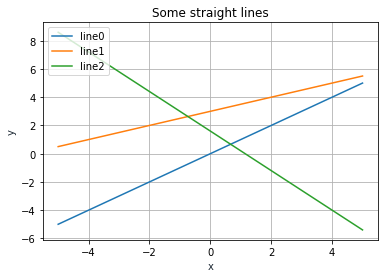

In [17]:
lines = []
lines.append(StraightLines(1, 0))
lines.append(StraightLines(0.5, 3))
lines.append(StraightLines(-1.4, 1.6))

import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-5,5,100)
for index, line in enumerate(lines):
    line = np.vectorize(line)
    plt.plot(X, line(X), label='line' + str(index))

plt.title('Some straight lines')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Our next example is also exciting. The class FuzzyTriangleArea defines a ```__call__``` method which implements a fuzzy behaviour in the calculations of the area. The result should be correct with a likelihood of p, e.g. 0.8. If the result is not correct the result will be in a range of ± v %. e.g. 0.1.

In [18]:
import random

class FuzzyTriangleArea:
    
    def __init__(self, p=0.8, v=0.1):
        self.p, self.v = p, v
        
    def __call__(self, a, b, c):
        p = (a + b + c) / 2
        result = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        if random.random() <= self.p:
            return result
        else:
            return random.uniform(result-self.v, 
                                  result+self.v)
        
area1 = FuzzyTriangleArea()
area2 = FuzzyTriangleArea(0.5, 0.2)
for i in range(12):
    print(f"{area1(3, 4, 5):4.3f}, {area2(3, 4, 5):4.2f}")

5.993, 5.95
6.000, 6.00
6.000, 6.00
5.984, 5.91
6.000, 6.00
6.000, 6.00
6.000, 6.17
6.000, 6.13
6.000, 6.01
5.951, 6.00
6.000, 5.95
5.963, 6.00


Beware that this output differs with every call! We can see the in most cases we get the right value for the area but sometimes not.

We can create many different instances of the previous class. Each of these behaves like an area function, which returns a value for the area, which may or may not be correct, depending on the instantiation parameters p and v. We can see those instances as experts (expert functions) which return in most cases the correct answer, if we use p values close to 1. If the value v is close to zero, the error will be small, if at all. The next task would be merging such experts, let's call them exp1, exp2, ..., expn to get an improved result. We can perform a vote on the results, i.e. we will return the value which is most often occuring, the correct value. Alternatively, we can calculate the arithmetic mean. We will implement both possibilities in our class FuzzyTriangleArea: 

<img width=90% src="../images/merger_callable__call__.webp" srcset="../images/merger_callable__call___800w.webp 800w,../images/merger_callable__call___700w.webp 700w,../images/merger_callable__call___600w.webp 600w,../images/merger_callable__call___500w.webp 500w,../images/merger_callable__call___400w.webp 400w,../images/merger_callable__call___350w.webp 350w,../images/merger_callable__call___300w.webp 300w" alt="MergeExperts class with __call__ method">

In [19]:
from random import uniform, random
from collections import Counter

class FuzzyTriangleArea:

    def __init__(self, p=0.8, v=0.1):
        self.p, self.v = p, v
        
    def __call__(self, a, b, c):
        p = (a + b + c) / 2
        result = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        if random() <= self.p:
            return result
        else:
            return uniform(result-self.v, 
                                  result+self.v)
     
   
class MergeExperts:
    
    def __init__(self, mode, *experts):
        self.mode, self.experts = mode, experts
        
    def __call__(self, a, b, c):
        results= [exp(a, b, c) for exp in self.experts]
        if self.mode == "vote":
            c = Counter(results)
            return c.most_common(1)[0][0]
        elif self.mode == "mean":
            return sum(results) / len(results)

rvalues = [(uniform(0.7, 0.9), uniform(0.05, 0.2)) for _ in range(20)]
experts = [FuzzyTriangleArea(p, v) for p, v in rvalues]
merger1 = MergeExperts("vote", *experts)
print(merger1(3, 4, 5))
merger2 = MergeExperts("mean", *experts)
print(merger2(3, 4, 5))

6.0
6.0073039634137375


The following example defines a class with which we can create abitrary polynomial functions:

In [20]:
class Polynomial:
    
    def __init__(self, *coefficients):
        self.coefficients = coefficients[::-1]
        
    def __call__(self, x):
        res = 0
        for index, coeff in enumerate(self.coefficients):
            res += coeff * x** index
        return res

# a constant function
p1 = Polynomial(42)

# a straight Line
p2 = Polynomial(0.75, 2)

# a third degree Polynomial
p3 = Polynomial(1, -0.5, 0.75, 2)

for i in range(1, 10):
    print(i, p1(i), p2(i), p3(i))

1 42 2.75 3.25
2 42 3.5 9.5
3 42 4.25 26.75
4 42 5.0 61.0
5 42 5.75 118.25
6 42 6.5 204.5
7 42 7.25 325.75
8 42 8.0 488.0
9 42 8.75 697.25


You will find further interesting examples of the ```__call__``` function in our tutorial in the chapters [Decorators](https://www.python-course.eu/python3_decorators.php) and [Memoization with Decorators](https://www.python-course.eu/python3_memoization.php). You may also consult our chapter on [Polynomials](https://www.python-course.eu/polynomial_class_in_python.php).

### Standard Classes as Base Classes
It's possible to use standard classes - like int, float, dict or lists - as base classes as well.

We extend the list class by adding a push method:

In [21]:
class Plist(list):

    def __init__(self, l):
        list.__init__(self, l)

    def push(self, item):
        self.append(item)


if __name__ == "__main__":
    x = Plist([3,4])
    x.push(47)
    print(x)

[3, 4, 47]


This means that all the previously introduced binary and extended assignment operators exist in the "reversed" version as well:            
```__radd__``` , ```__rsub__``` , ```__rmul__``` etc.

### Exercises

<img class="imgright" width=300 src="../images/money_canadian_part.webp" srcset="../images/money_canadian_part_800w.webp 800w,../images/money_canadian_part_700w.webp 700w,../images/money_canadian_part_600w.webp 600w,../images/money_canadian_part_500w.webp 500w,../images/money_canadian_part_400w.webp 400w,../images/money_canadian_part_350w.webp 350w,../images/money_canadian_part_300w.webp 300w" alt="Canadian money" />
    
#### Exercise 1

Write a class with the name Ccy, similar to the previously defined Length class.Ccy should contain values in various currencies, e.g. "EUR", "GBP" or "USD". An instance should contain the amount and the currency unit. The class, you are going to design as an exercise, might be best described with the following example session:

```
from currencies import Ccy
v1 = Ccy(23.43, "EUR")
v2 = Ccy(19.97, "USD")
print(v1 + v2)
print(v2 + v1)
print(v1 + 3) # an int or a float is considered to be a EUR value
print(3 + v1)
```

### Solutions to our Exercises

#### Solution to Exercise 1


In [29]:
%%writefile currencies.py

"""

    The class "Ccy" can be used to define money values in various currencies. A Ccy instance has the string attributes 'unit' (e.g. 'CHF', 'CAD' od 'EUR' and the 'value' as a float. 
    A currency object consists of a value and the corresponding unit.
    """

        

class Ccy:

    currencies =  {'CHF': 1.0821202355817312, 
                       'CAD': 1.488609845538393, 
                       'GBP': 0.8916546282920325, 
                       'JPY': 114.38826536281809, 
                       'EUR': 1.0, 
                       'USD': 1.11123458162018}
    
    def __init__(self, value, unit="EUR"):
        self.value = value
        self.unit = unit

    def __str__(self):
        return "{0:5.2f}".format(self.value) + " " + self.unit

    def changeTo(self, new_unit):
        """
            An Ccy object is transformed from the unit "self.unit" to "new_unit"
        """
        self.value = (self.value / Ccy.currencies[self.unit] * Ccy.currencies[new_unit])
        self.unit = new_unit
            
    def __add__(self, other):
        """
            Defines the '+' operator.
            If other is a CCy object the currency values 
            are added and the result will be the unit of 
            self. If other is an int or a float, other will
            be treated as a Euro value. 
        """
        if type(other) == int or type(other) == float:
            x = (other * Ccy.currencies[self.unit])
        else:
            x = (other.value / Ccy.currencies[other.unit] * Ccy.currencies[self.unit]) 
        return Ccy(x + self.value, self.unit)


    def __iadd__(self, other):
        """
            Similar to __add__
        """
        if type(other) == int or type(other) == float:
            x = (other * Ccy.currencies[self.unit])
        else:
            x = (other.value / Ccy.currencies[other.unit] * Ccy.currencies[self.unit])
        self.value += x
        return self

    def __radd__(self, other):
        res = self + other
        if self.unit != "EUR":
            res.changeTo("EUR")
        return res

        # __sub__, __isub__ and __rsub__ can be defined analogue



Overwriting currencies.py


In [30]:
from currencies import Ccy

x = Ccy(10,"USD")
y = Ccy(11)
z = Ccy(12.34, "JPY")
z = 7.8 + x + y + 255 + z
print(z)

lst = [Ccy(10,"USD"), Ccy(11), Ccy(12.34, "JPY"), Ccy(12.34, "CAD")]

z = sum(lst)

print(z)

282.91 EUR
28.40 EUR


Another interesting aspect of this currency converter class in Python can be shown, if we add multiplication. You will easily understand that it makes no sense to allow expressions like ``` "12.4 € * 3.4 USD" ``` (or in prefix notation: "€ 12.4 * $ 3.4"), but it makes perfect sense to evaluate "3 * 4.54 €". You can find the new currency converter class with the newly added methods for ```__mul__```, ```__imul__``` and ```__rmul__``` in the following listing:

In [39]:
%%writefile currency_converter.py

"""
    The class "Ccy" can be used to define money values in various currencies. A Ccy instance has the string attributes 'unit' (e.g. 'CHF', 'CAD' od 'EUR' and the 'value' as a float. 
    A currency object consists of a value and the corresponding unit.
"""   

class Ccy:

    currencies =  {'CHF': 1.0821202355817312, 
                       'CAD': 1.488609845538393, 
                       'GBP': 0.8916546282920325, 
                       'JPY': 114.38826536281809, 
                       'EUR': 1.0, 
                       'USD': 1.11123458162018}
        
    def __init__(self, value, unit="EUR"):
        self.value = value
        self.unit = unit

    def __str__(self):
        return "{0:5.2f}".format(self.value) + " " + self.unit

    def __repr__(self):
        return 'Ccy(' + str(self.value) + ', "' + self.unit + '")'

    def changeTo(self, new_unit):
        """
            An Ccy object is transformed from the unit "self.unit" to "new_unit"
        """
        self.value = (self.value / Ccy.currencies[self.unit] * Ccy.currencies[new_unit])
        self.unit = new_unit
            
    def __add__(self, other):
        """
            Defines the '+' operator.
            If other is a CCy object the currency values 
            are added and the result will be the unit of 
            self. If other is an int or a float, other will
            be treated as a Euro value. 
        """
        if type(other) == int or type(other) == float:
                x = (other * Ccy.currencies[self.unit])
        else:
                x = (other.value / Ccy.currencies[other.unit] * Ccy.currencies[self.unit]) 
        return Ccy(x + self.value, self.unit)


    def __iadd__(self, other):
        """
            Similar to __add__
        """
        if type(other) == int or type(other) == float:
            x = (other * Ccy.currencies[self.unit])
        else:
            x = (other.value / Ccy.currencies[other.unit] * Ccy.currencies[self.unit])
            self.value += x
        return self

    def __radd__(self, other):
        res = self + other
        if self.unit != "EUR":
            res.changeTo("EUR")
        return res
        
        # __sub__, __isub__ and __rsub__ can be defined analogue
        

    def __mul__(self, other):
        """
            Multiplication is only defined as a scalar multiplication, 
            i.e. a money value can be multiplied by an int or a float.
            It is not possible to multiply to money values
        """
        if type(other)==int or type(other)==float:
            return Ccy(self.value * other, self.unit)
        else:
            raise TypeError("unsupported operand type(s) for *: 'Ccy' and " + type(other).__name__)  
            
    def __rmul__(self, other):
        return self.__mul__(other)
        
    def __imul__(self, other):
        if type(other)==int or type(other)==float:
            self.value *= other
            return self
        else:
            raise TypeError("unsupported operand type(s) for *: 'Ccy' and " + type(other).__name__)      


Overwriting currency_converter.py


Assuming that you have saved the class under the name currency_converter, you can use it in the following way in the command shell:

In [40]:
from currency_converter import Ccy
x = Ccy(10.00, "EUR")
y = Ccy(10.00, "GBP")
x + y

Ccy(21.215104685942173, "EUR")

In [41]:
print(x + y)

21.22 EUR


In [42]:
print(2*x + y*0.9)

30.09 EUR


### Footnotes

* as suggested by Mark Jackson